### Python Script to Compute Mann Kendall trends written by Herbert. O. Misiani and modified by Samuel Ekwacu

### Computing persistent hot spell events trends over Africa-Seasonal

In [102]:
## libraries to install for first time 
#conda install -c conda-forge regionmask
# conda install -c conda-forge geopandas
#conda install -c conda-forge descartes
#conda install -c conda-forge pymannkendall
#conda install -c conda-forge cartopy
#conda install -c conda-forge pyogrio
#conda install -c conda-forge xeofs
#conda install -c conda-forge r-correlation
#conda install -c conda-forge pytest-regressions

In [31]:
import pymannkendall as mk
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import matplotlib.path as mplPath
## for plotting a polygon
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [43]:
#uploaded.keys()
#home_dir = 'D:/Folder_2023/Research/' ## read in the data
#data_dir = 'Africa_Research/Hotspell_Africa/tmean_analysis/'
#plot_dir = 'Africa_Research/Hotspell_Africa/trend_plots/tmean_plots/'
#temp = xr.open_dataset(home_dir + data_dir + 'JRA55-tmean-monthly_v3_1991-2021.nc')  ##input file                          
wspd = xr.open_dataset('C:/Diabatic_data/WIND/uvwind_mon/wspd_1961-2021.nc')
#wspd.var
wspd.data_vars

Data variables:
    ws       (time, lev, lat, lon) float32 ...

In [44]:
#wspd.lev  # print presure level
wspd = wspd.sel(lev=85000) #selecting to the pressure level
#wspd

In [45]:
#wspd = wspd.sel(time=slice("1961-01-01", "1990-12-01"))

In [46]:
wspd.coords['lon']=(wspd.coords['lon']+180)%360-180
wspd=wspd.sortby(wspd.lon) 

In [47]:
###########NOTE; Change appropriately below to compute either annual or Seasonal trends #########

###For Annual Trends Only
data =wspd['ws'].groupby('time.year').mean('time')    ## Group data into yearly means for annual trends
#dat_samp
 
### For Seasonal trends of MAM, JJA, SON and DJF only
#Data_seas = temp.groupby('time.season')   ##Group data into seasonal means for seasonal trends
#Data_seas
#Data_sea = Data_seas['DJF']
#Data_sea
#Data = Data_sea['tmean'].groupby('time.year').mean('time') ## Group data into yearly means from seasonal mean.
#Data

In [48]:
#dat_samp = Data.sel(lon=slice(27.5, 42.5), lat=slice(-12, 5))  ## Slice to EA
dat_samp = data.sel(lon=slice(-150, 150), lat=slice(60, -60))  ## Slice to Africa
slope_val = np.zeros((len(dat_samp.lat.values),len(dat_samp.lon.values)))
p_value = np.zeros((len(dat_samp.lat.values),len(dat_samp.lon.values)))
#output = []
for i in np.arange(len(dat_samp.lat.values)):
    for j in np.arange(len(dat_samp.lon.values)):
        
        try:
            slope_val[i,j] = mk.original_test(dat_samp[:,i,j]).slope  ## trend,h,p,z,tau,s,var_s,slope,intercept = mk.original_test(x,0.05)
            p_value[i,j] = mk.original_test(dat_samp[:,i,j]).p
        except:
            slope_val[i,j] = np.nan
            p_value[i,j] = np.nan
            
        #output.append(slope_val)      

In [49]:
## Define data as Xarray dataset and save as netcdf
output1=xr.DataArray(slope_val, dims=('lat', 'lon'), coords={'lat':dat_samp.lat, 'lon':dat_samp.lon}, attrs=dict(description="slope.", units="sst year-1"),)
data1 = output1.rename("trend")

output2=xr.DataArray(p_value, dims=('lat', 'lon'), coords={'lat':dat_samp.lat, 'lon':dat_samp.lon}, attrs=dict(description="significance",),)
data2 = output2.rename("p_val")
#data2
## Save Data as netcdf
#data1.to_netcdf(home_dir + data_dir +'Af_tmean_1991-2021_Annual_trend.nc', mode='w')
#data2.to_netcdf(home_dir + data_dir +'Af_tmean_1991-2021_Annual_pvalue.nc', mode='w')

In [50]:
## read the Shapefile of the Area of interest for use in masking over the required region
#sf = gpd.read_file('F://Folder_2022//Research//EA_Shp//East_Africa-Disolved.shp')  ## Used in Masking
#sf2 = shp.Reader('F://Folder_2022//Research//EA_Shp//EA.shp')       ## Used in plotting

#sf = gpd.read_file('D://Folder_2023//Research//Africa_Research//shapefile//Africa_admin1.shp')  ## Used in Masking
#sf2 = shp.Reader('F://Folder_2022//Research//Africa_Research//shapefile//Africa_admin1.shp')       ## Used in plotting

## Mask the trends and p_values
#trend_mask = regionmask.mask_3D_geopandas(sf, data1.Lon, data1.Lat, lon_name='Lon', lat_name='Lat')
#pval_mask = regionmask.mask_3D_geopandas(sf, data2.Lon, data2.Lat, lon_name='Lon', lat_name='Lat')
#trnd = data1.where(trend_mask)         ## clip the data with the mask
#pval = data2.where(pval_mask)

In [51]:
## clip the data with the mask
trnd = data1        
pval = data2
#pval

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_10300\3382167457.py:7: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.gcf().subplots_adjust(hspace=0, wspace=0.08)


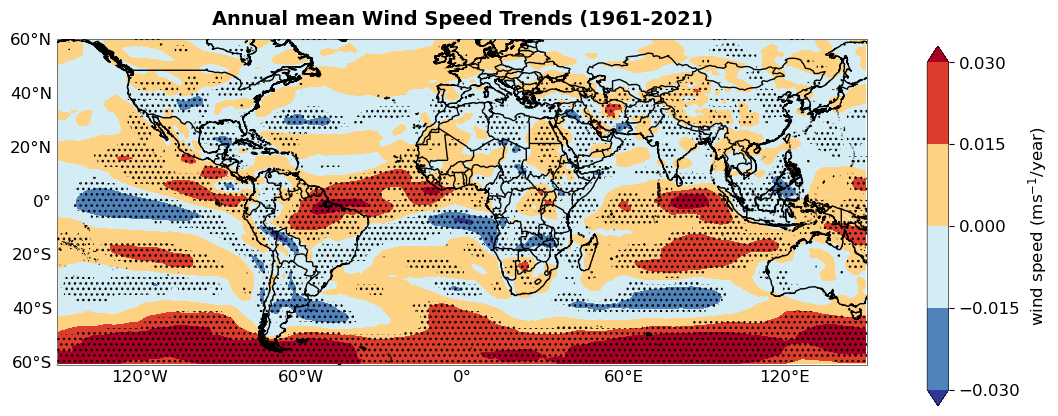

In [60]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig = plt.subplots(constrained_layout=True, figsize=(12, 6))
mpl.rcParams['font.family'] #= 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 0.4
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=0))

gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
#plt.gca().set_yticks(np.arange(-60,80,20),crs=ccrs.PlateCarree())
#plt.gca().set_xticks(np.arange(-150,170,50),crs=ccrs.PlateCarree())
## Change this to the threshold you need.
#cond = (pval >= -0.05) & (pval <= 0.05)
cond = (pval <= 0.05)
## Mask out the areas that do not satisfy the conditions
sig_reg = pval.where(cond)

## Plotting the figure
#for poly in sf2.shapes():
 #   poly_geo=poly.__geo_interface__
 #   ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))

cs = plt.contourf(dat_samp.lon, dat_samp.lat, trnd.values[:,:],  
                levels=np.arange(-0.03, 0.045, 0.015),cmap=plt.cm.RdYlBu_r, extend='both') #RdBu #YlOrRd,YlOrBr,YlOrBr  #levels=np.arange(-9, 12, 3)
## make a hatch of significance
hatch = ax.pcolor(dat_samp.lon, dat_samp.lat, sig_reg.data[:,:], cmap=none_map, 
                 hatch='...', edgecolor='black', lw=0, zorder=4)

# Adding geographical features
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.add_feature(cfeature.BORDERS,color='black', linewidth=1)
## title attributes
plt.title('Annual mean Wind Speed Trends (1961-2021)',fontsize=14, fontweight='bold')
#plt.xticks(np.arange(-150,170,50), size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=14, fontweight='bold')
plt.xlabel('Longitude',fontsize=14, fontweight='bold')
##ploting the legend
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
#####cax = plt.axes([0.85, 0.1, 0.018, 0.6])s
###plt.colorbar(cax=cax)
plt.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='wind speed (ms$^{-1}$/year)')
# save output
plt.savefig('C:/Diabatic_data/WIND/uvwind_mon/Wind_speed_trends_1961-2021.png', dpi=300)
plt.show()

### God is Great















